# Introducción al Aprendizaje Automatizado - TP0
## **Alumno:** Mellino, Natalia



### Apartado a)

Definimos una función que genera un dataframe de longitud dada $n$ de acuerdo a 
lo siguiente:

- Los datos tienen $d$ inputs, que son valores reales correspondientes a la 
posición del punto en un espacio $d$-dimensional.
- El output es binario, y corresponde a la clase a la que pertenece el ejemplo:
    - La clase 1 corresponde a puntos generados al azar, provenientes de una
    distribución normal con centro en el (1, 1, ..., 1) y matriz de covarianza
    diagonal, con desviación estandar: $C * \sqrt{d}$
    - La clase 0 tiene la misma distribución pero centrada en el (-1, -1, ..., -1).
- Los parámetros que toma la función son: $n, d, C$.
- De los $n$ puntos generados, $n/2$ deben pertenecer a cada clase.

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from typing import List


# Definimos primero una función general para poder usar tanto en el apartado a)
# como en el b)
def generate_dataframe(d: int, n: int, deviation: float, center0: List[int], center1: List[int]):    
    m = [deviation**2] * d
    # Generamos los n/2 puntos de la clase 0
    data0 = np.random.multivariate_normal(center0, np.diag(m), n//2)  
    # Generamos los n/2 puntos de la clase 1
    data1 = np.random.multivariate_normal(center1, np.diag(m), math.ceil(n/2))  


    # Concatenamos ambos arrays, primero colocamos los puntos correspondientes a 
    # la clase 0 y luego los correspondientes a la clase 1 así luego no es más
    # fácil clasificarlos.
    data = np.concatenate((data0, data1), axis=0)

    # Generamos las columnas que representarán las coordenadas de cada punto.
    cols = list(map(str, list(range(d))))
    # Generamos el dataframe
    df = pd.DataFrame(data, columns=cols)
    # Agregamos al final del dataframe la columna que representa la clase de
    # cada punto.
    df['Class'] = ([0] * (n // 2)) + ([1] * (math.ceil(n/2)))
    
    return df

def generate_dataframe_a(d: int, n: int, C: float): 
    deviation = C * sqrt(d)
    c0 = [-1] * d
    c1 = [1] * d
    return generate_dataframe(d, n, deviation, c0, c1)


### Apartado b)

Para este apartado se pide lo mismo que en el a) pero cada distribución tiene
centro $(1, 0, ..., 0)$ y $(-1, 0, ..., 0)$ respectivamente. La desviación estándar 
es $C$ independientemente de $d$.

In [ ]:
def generate_dataframe_b(d: int, n: int, C: float):
    deviation = C
    c0 = [-1] + ([0] * (d - 1))
    c1 = [1] + ([0] * (d - 1))
    return generate_dataframe(d, n, deviation, c0, c1)

### Análisis

Ya tenemos nuestra función que genera nuestro dataframe, ahora lo graficaremos
para analizar visualmente los datos.

Tomamos como parámetros: $d= 2, n = 200, C = 0.75$ y analizamos el gráfico que
nos genera el dataframe del apartado a).

In [ ]:
import matplotlib.pyplot as plt


df = generate_dataframe_a(d=2, n=200, C=0.75)
df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')


Ahora, con los mismo valores, analizamos el gráfico que nos devuelve el generado
por el dataframe del apartado b).

In [ ]:
import matplotlib.pyplot as plt


df = generate_dataframe_b(d=2, n=200, C=0.75)
df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')
plt.show()

Ahora se nos pide generar conjuntos con: $d = 4, n = 2000, C = 2.0$ y verificar
que las medias y desviaciones estándar sean correctas.

Ahora procedemos a analizar la media y desviación estándar en cada caso.

In [ ]:
import numpy as np

n = 2000

# Dataframe para el apartado a)
df_a = generate_dataframe_a(d = 4, n = 2000, C = 2.0)
# Dataframe para el apartado b)
df_b = generate_dataframe_b(d = 4, n = 2000, C = 2.0)

print("Media para el dataframe del apartado a)")
ga = df_a.groupby('Class')
print(ga.mean())
print("\nDesviación estandar para el dataframe del apartado a)")
print(ga.std())

gb = df_b.groupby('Class')
print("\nMedia para el dataframe del apartado b)")
print(gb.mean())
print("\nDesviación estandar para el dataframe del apartado b)")
print(gb.std())

Observando el output podemos ver que los valores se acercan a los esperados con
un cierto margen de error.

## Apartado c)

**Espirales anidadas:** los datos 2 inputs, $x$ e $y$ que corresponden a puntos
generados al azar  con una distribución uniforme dentro de un círculo de radio 1.
El output es binario, correspondiendo a la clase 0 los puntos que se encuentran
entre las curvas $\rho = \frac{\theta}{4\pi}$ y $\rho = \frac{\theta + \pi}{4\pi}$

           x      y
Class              
0      10000  10000
1      10000  10000


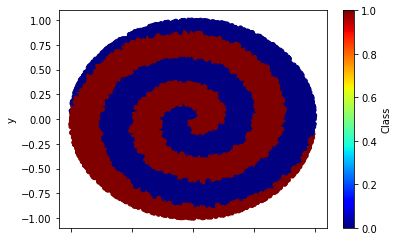

In [13]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Las funciones que representan nuestras curvas
def curve1(theta):
    return theta / (4 * math.pi)

def curve2(theta):
    return (theta + math.pi) / (4 * math.pi)

def generate_points_c(n):

    len0 = n // 2
    len1 = n - len0

    class0 = 0
    class1 = 0

    # Radio y centro del circulo
    radius = 1
    x, y = (0, 0)

    # Guardamos las coordenadas x e y respectivamente
    xs = []
    ys = []

    clases = []
    # Tamaño random de puntos a generar
    # for i in range(0, n):
    while (class0 < len0) or (class1 < len1):
    # random.random() devuelve numeros entre 0.0 y 1.0
        theta = 2 * math.pi * random.random()
        r = radius * math.sqrt(random.random())

        # clase = 0
        # Sumando de a 0.5 vamos dando vuelta alrededor de todo el espiral (esto 
        # se puede ver analizando una gráfica de la curva1) y vemos 
        # si el radio cae en alguna de las franjas correctas, y de ser así
        # le asignamos la clase 1 a ese punto, en caso contrario esta permanecerá
        # en 0.
        flag = False
        for theta0 in [theta + (2 * math.pi * i) for i in range(-1, 6)]:
            if (curve1(theta0) < r and r < curve2(theta0)):
                if class1 < len1:
                    class1 += 1
                    # Convertimos las coordenadas polares a cartesianas y almacenamos.
                    xs.append(r * math.cos(theta) + x)
                    ys.append(r * math.sin(theta) + y)
                    # Guadamos la clase correspondiente al punto generado.
                    clases.append(1)
                flag = True
                continue
        if class0 < len0 and not flag:
            class0 += 1
            # Convertimos las coordenadas polares a cartesianas y almacenamos.
            xs.append(r * math.cos(theta) + x)
            ys.append(r * math.sin(theta) + y)
            # Guadamos la clase correspondiente al punto generado.
            clases.append(0)

    # Generamos el dataframe
    points = {'x': xs, 'y': ys, 'Class': clases}
    df = pd.DataFrame(points)
    print(df.groupby('Class').count())
    return df

# Graficamos
df = generate_points_c(20000)
df.plot(x=0, y=1, kind='scatter', c='Class', colormap='jet')

